In [150]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [151]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision.transforms import transforms
import torch.nn as nn

In [152]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 
device

device(type='cpu')

In [153]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5]),
])

In [154]:
train_data = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=4, shuffle=True)

test_data = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=4, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [155]:
classes = train_data.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

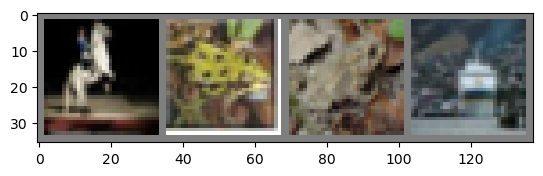

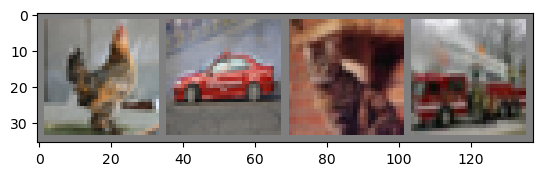

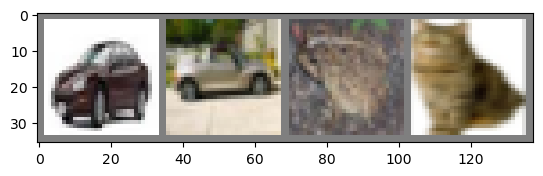

In [156]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)

for i in range(3):

    images, labels = next(dataiter)

    # show images
    imshow(torchvision.utils.make_grid(images))


In [187]:
n_epochs = 25
learning_rate = 0.001

In [188]:
class LeNet(nn.Module):

    def __init__(self, num_classes=len(classes)):

        super(LeNet, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 6, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=(2, 2), stride=2),
            nn.Conv2d(6, 16, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(kernel_size=(2, 2), stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(5*5*16, 120),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(120, 84),
            nn.ReLU(inplace=True),
            nn.Linear(84, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


In [189]:
model = LeNet().to(device)

In [190]:
model

LeNet(
  (features): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): AvgPool2d(kernel_size=(2, 2), stride=2, padding=0)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=400, out_features=120, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=120, out_features=84, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [191]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)


In [192]:
n_total_steps = len(train_loader)

In [193]:
n_total_steps

12500

In [194]:
def train(model, loss_fn = 0):

    for epochs in range(n_epochs):

        for i, (images, labels) in enumerate(train_loader):

            images = images.to(device)
            labels = labels.to(device)

            # Forward pass

            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass
            optimizer.zero_grad()

            loss.backward()
            optimizer.step()

            if (i+1)%2000 == 0:

                print(f'Epoch: {epochs+1}, step: {i+1}, loss = {loss: .3f}')

        print('--------------------------------')

            
    loss_fn += loss
    print('Finished Training')

In [195]:
def test(model, accuracy=0, class_acc = []):

    with torch.no_grad():

        n_correct = 0
        n_samples = 0

        n_class_correct = [0 for i in range(10)]
        n_class_samples = [0 for i in range(10)]

        for images, labels in test_loader:

            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

            for i in range(4):
                
                label = labels[i]
                pred = predicted[i]

                if label == pred:
                    
                    n_class_correct[label] += 1
                
                n_class_samples[label] +=  1


        accuracy += 100 * n_correct / n_samples
        print(f'accuracy of the network = {accuracy}')

        print('--------------------------------')

        for i in range(10):

            class_acc.append(100* n_class_correct[i]/n_class_samples[i])

            print(f'accuracy of {classes[i]} = {class_acc[i]}')

In [196]:
loss = 0
train(model, loss_fn=loss)

Epoch: 1, step: 2000, loss =  2.301
Epoch: 1, step: 4000, loss =  1.738
Epoch: 1, step: 6000, loss =  1.733
Epoch: 1, step: 8000, loss =  2.227
Epoch: 1, step: 10000, loss =  1.347
Epoch: 1, step: 12000, loss =  2.870
--------------------------------
Epoch: 2, step: 2000, loss =  2.201
Epoch: 2, step: 4000, loss =  1.748
Epoch: 2, step: 6000, loss =  1.483
Epoch: 2, step: 8000, loss =  0.931
Epoch: 2, step: 10000, loss =  0.738
Epoch: 2, step: 12000, loss =  1.536
--------------------------------
Epoch: 3, step: 2000, loss =  1.166
Epoch: 3, step: 4000, loss =  0.569
Epoch: 3, step: 6000, loss =  1.367
Epoch: 3, step: 8000, loss =  1.425
Epoch: 3, step: 10000, loss =  2.134
Epoch: 3, step: 12000, loss =  0.567
--------------------------------
Epoch: 4, step: 2000, loss =  1.775
Epoch: 4, step: 4000, loss =  0.559
Epoch: 4, step: 6000, loss =  0.688
Epoch: 4, step: 8000, loss =  0.899
Epoch: 4, step: 10000, loss =  0.771
Epoch: 4, step: 12000, loss =  1.046
-----------------------------

In [204]:
model.features[0].weight

Parameter containing:
tensor([[[[-5.3545e-01,  3.5857e-01,  9.4181e-01,  1.5810e-01, -3.4446e-01],
          [ 2.6065e-01,  6.3907e-01, -6.9099e-02, -3.1614e-01,  3.3320e-01],
          [-2.8939e-01, -1.9028e+00, -3.0984e+00, -1.4111e+00,  6.4973e-01],
          [ 1.2877e-01,  3.4115e-02,  6.0950e-01,  1.0325e+00,  1.9839e-01],
          [-3.2662e-01,  6.4318e-01,  1.4589e+00,  7.2722e-01, -6.4207e-01]],

         [[-2.5646e-01,  7.7925e-01,  1.1661e+00,  1.3089e-01, -8.8530e-01],
          [ 8.7528e-01,  1.1964e+00,  2.7628e-01, -9.9086e-02, -8.8885e-02],
          [ 1.3395e-01, -1.4587e+00, -2.5656e+00, -1.1676e+00,  5.9850e-01],
          [ 3.0301e-01,  3.3738e-02,  7.0401e-01,  9.5959e-01, -6.7766e-02],
          [-2.6725e-01,  4.0134e-01,  1.2233e+00,  4.0725e-01, -1.4141e+00]],

         [[-8.9741e-01,  1.7211e-02,  5.1792e-01,  6.9462e-02, -5.7362e-01],
          [ 5.9810e-01,  1.0194e+00,  4.3132e-01,  3.8170e-01,  6.9383e-01],
          [-1.7130e-01, -1.7759e+00, -2.4849e+00, 

In [197]:
accuracy = 0
class_acc = []
test(model, accuracy, class_acc)

accuracy of the network = 60.35
--------------------------------
accuracy of airplane = 68.2
accuracy of automobile = 63.2
accuracy of bird = 43.0
accuracy of cat = 36.9
accuracy of deer = 54.9
accuracy of dog = 60.6
accuracy of frog = 72.1
accuracy of horse = 59.6
accuracy of ship = 81.0
accuracy of truck = 64.0
